In [1]:
import pandas as pd

df = pd.read_excel('data/default of credit card clients.xls',
                   skiprows=1,
                   index_col='ID')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
from pandas_profiling import ProfileReport

report = ProfileReport(df)
report.to_file('defaults.html')

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df['default payment next month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [4]:
df.shape

(30000, 24)

In [5]:
import phik

phik_corr = df.phik_matrix()

interval columns not set, guessing: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


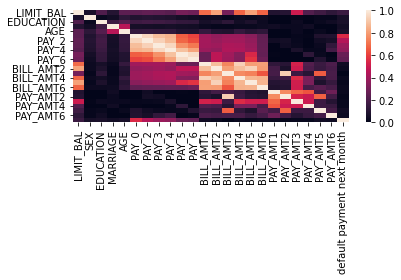

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(phik_corr)
plt.tight_layout()

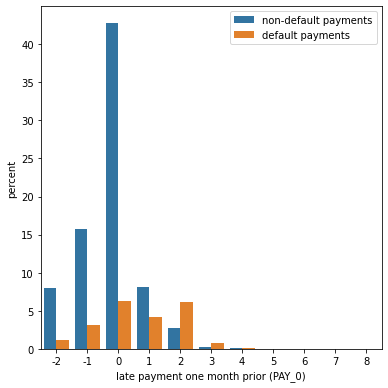

In [7]:
f = plt.figure(figsize=(5.5, 5.5))
sns.barplot(data=df,
            x='PAY_0',
            y='PAY_0',
            hue='default payment next month',
            estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel('percent')
legend = plt.legend()
legend.get_texts()[0].set_text('non-default payments')
legend.get_texts()[1].set_text('default payments')
plt.xlabel('late payment one month prior (PAY_0)')
plt.tight_layout()

In [8]:
import pycaret.classification as pyclf

setup = pyclf.setup(data=df, target='default payment next month')

,Description,Value
0,session_id,2468
1,Target,default payment next month
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(30000, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best_model = pyclf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8222,0.0000,0.3570,0.6822,0.4680,0.3738,0.4024,0.0450
lda,Linear Discriminant Analysis,0.8213,0.7663,0.3724,0.6671,0.4774,0.3801,0.4039,0.1840
gbc,Gradient Boosting Classifier,0.8205,0.7814,0.3536,0.6749,0.4632,0.3681,0.3961,1.0350
catboost,CatBoost Classifier,0.8193,0.7787,0.3666,0.6598,0.4705,0.3724,0.3961,4.0410
lightgbm,Light Gradient Boosting Machine,0.8191,0.7748,0.3614,0.6622,0.4668,0.3692,0.3941,0.1700
ada,Ada Boost Classifier,0.8187,0.7741,0.3434,0.6709,0.4537,0.3585,0.3877,0.2580
rf,Random Forest Classifier,0.8171,0.7622,0.3653,0.6486,0.4668,0.3669,0.3891,0.4720
xgboost,Extreme Gradient Boosting,0.8143,0.7622,0.3655,0.6341,0.4631,0.3607,0.3810,1.3810
et,Extra Trees Classifier,0.8084,0.7403,0.3707,0.6034,0.4588,0.3506,0.3661,0.4620
lr,Logistic Regression,0.7803,0.6481,0.0000,0.0000,0.0000,-0.0001,-0.0012,0.4180


In [10]:
tuned_model = pyclf.tune_model(best_model, search_library='scikit-optimize')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8276,0.0000,0.4143,0.6749,0.5134,0.4159,0.4342
1,0.8238,0.0000,0.3796,0.6757,0.4861,0.3897,0.4133
2,0.8181,0.0000,0.3297,0.6756,0.4431,0.3495,0.3816
3,0.8210,0.0000,0.3492,0.6793,0.4613,0.3669,0.3962
4,0.8224,0.0000,0.3753,0.6705,0.4812,0.3842,0.4078
5,0.8281,0.0000,0.3623,0.7137,0.4806,0.3905,0.4228
6,0.8195,0.0000,0.3485,0.6736,0.4593,0.3639,0.3924
7,0.8267,0.0000,0.3636,0.7059,0.4800,0.3885,0.4193
8,0.8138,0.0000,0.3009,0.6715,0.4155,0.3234,0.3604
9,0.8218,0.0000,0.3492,0.6851,0.4626,0.3691,0.3992


In [11]:
predictions = pyclf.predict_model(tuned_model, df, raw_score=True)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(df['default payment next month'], predictions['Label'])

0.8214666666666667

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

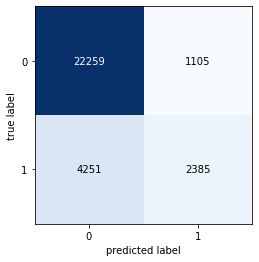

In [13]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(confusion_matrix(df['default payment next month'], predictions['Label']))

In [14]:
pyclf.evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [15]:
df[df['PAY_5'] == 6]['default payment next month'].value_counts(normalize=True)

1    0.75
0    0.25
Name: default payment next month, dtype: float64

In [16]:
df[df['PAY_5'] == 6]['default payment next month'].value_counts()

1    3
0    1
Name: default payment next month, dtype: int64